In [2]:
import pandas as pd
import numpy as np
# import jax
# import jax.numpy as jnp
# from jax import jit

In [3]:
cpi = pd.read_csv("CPIAUCSL.csv")
#cpi = pd.read_csv("T5YIE.csv")
cpi.columns = ["date", 'CPI_Percent_Change']

In [4]:
cpi.head()

,date,CPI_Percent_Change
0,1947-02-01,0.65177
1,1947-03-01,1.75763
2,1947-04-01,0.00000
3,1947-05-01,-0.22727
4,1947-06-01,0.59226


In [14]:
cpi.shape

(911, 2)

In [18]:
cpi.date.min()

'1947-02-01'

In [76]:
cpi[cpi["CPI_Percent_Change"].str.contains(".")]

AttributeError: Can only use .str accessor with string values!

Read up on Jax boys, its the future
https://theaisummer.com/jax/#:~:text=What%20is%20Jax%3F%20Jax%20is%20a%20Python%20library,and%20Deepmind%20teams.%20Source%3A%20JAX%20documentation%20Install%20JAX

## Inflation Hedging Portfolio
In this notebook we will attempt to build a portfolio that hedges against inflation. We will bring in US equities data, and alternative data to do this.

Alt data ideas:
- Consumer confience
- Market sentiment
- AGRICULTURE
- Fed data
- SEC data

## Short term goals
- Explore equity data and make plots related to inflation factors
- Explore alt data for inflation sentiment or any other factors we want to consider

## Long term goal
- Build a portfolio that does well in high inflation periods
- Build a portfolio that does well in low inflation periods
- Predict inflation to reweight the portfolio (We can probably check our Inflation sentiment with the next months CPI,core CPI, or whichever other inflation metric we want to use) (article on this https://www.twosigma.com/articles/forecasting-inflation-like-a-data-scientist-2021-edition/)


## CPI Data

In [77]:
import plotly.express as px
fig = px.line(cpi, x='date', y="CPI_Percent_Change")
fig.show()

In [6]:
stocks = pd.read_csv("stocks.csv")

/var/folders/m6/h9jtrhyn259fytxp6j9xh9v00000gn/T/ipykernel_2516/3527778674.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  stocks = pd.read_csv("stocks.csv")


In [7]:
stocks.shape

(4664115, 11)

In [13]:
stocks["MthCalDt"].max()

'12/31/2021'

In [79]:
stocks.head()

,PERMNO,PrimaryExch,SecurityNm,Ticker,SICCD,ICBIndustry,MthCalDt,MthPrc,MthRet,MthVol,ShrOut
0,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,01/31/1986,4.375,0.707317,177082.0,3680.0
1,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,02/28/1986,3.25,-0.257143,82800.0,3680.0
2,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,03/31/1986,4.4375,0.365385,107801.0,3680.0
3,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,04/30/1986,4.0,-0.098592,95700.0,3793.0
4,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,05/30/1986,3.1094,-0.222656,107362.0,3793.0


In [80]:
stocks.dtypes

PERMNO           int64
PrimaryExch     object
SecurityNm      object
Ticker          object
SICCD            int64
ICBIndustry     object
MthCalDt        object
MthPrc          object
MthRet         float64
MthVol         float64
ShrOut         float64
dtype: object

In [19]:
stocks.columns

Index(['PERMNO', 'PrimaryExch', 'SecurityNm', 'Ticker', 'SICCD', 'ICBIndustry',
       'MthCalDt', 'MthPrc', 'MthRet', 'MthVol', 'ShrOut'],
      dtype='object')

In [81]:
stocks[stocks['PERMNO'] == 44602]

,PERMNO,PrimaryExch,SecurityNm,Ticker,SICCD,ICBIndustry,MthCalDt,MthPrc,MthRet,MthVol,ShrOut
1857671,44602,Q,INTER CONTINENTAL SERVICES CORP; COM NONE; CONS,ICSR,7399,NOAVAIL,12/29/1972,2.125,0.062500,NaN,845.0
1857672,44602,Q,INTER CONTINENTAL SERVICES CORP; COM NONE; CONS,ICSR,7399,NOAVAIL,01/31/1973,2.5,0.176471,NaN,845.0
1857673,44602,Q,INTER CONTINENTAL SERVICES CORP; COM NONE; CONS,ICSR,7399,NOAVAIL,02/28/1973,2.5,0.000000,NaN,845.0
1857674,44602,Q,INTER CONTINENTAL SERVICES CORP; COM NONE; CONS,ICSR,7399,NOAVAIL,03/30/1973,1.75,-0.300000,NaN,845.0
1857675,44602,Q,INTER CONTINENTAL SERVICES CORP; COM NONE; CONS,ICSR,7399,NOAVAIL,04/30/1973,1.9375,0.107143,NaN,845.0
...,...,...,...,...,...,...,...,...,...,...,...
1857815,44602,Q,INTER CONTINENTAL SERVICES CORP; COM NONE; CONS,ICSR,7399,NOAVAIL,12/31/1984,2.375,0.187500,16637.0,1645.0
1857816,44602,Q,INTER CONTINENTAL SERVICES CORP; COM NONE; CONS,ICSR,7399,NOAVAIL,01/31/1985,1.625,-0.315789,34000.0,1645.0
1857817,44602,Q,INTER CONTINENTAL SERVICES CORP; COM NONE; CONS,ICSR,7399,NOAVAIL,02/28/1985,1.625,0.000000,18938.0,1645.0
1857818,44602,Q,INTER CONTINENTAL SERVICES CORP; COM NONE; CONS,ICSR,7399,NOAVAIL,03/29/1985,1.25,-0.230769,28400.0,1645.0


In [82]:
temp = stocks['SecurityNm'].sample(n=1).values[0]
fig = px.line(x=stocks[stocks["SecurityNm"] == temp]["MthCalDt"], y=stocks[stocks["SecurityNm"] == temp]["MthRet"])
#44602
print(temp)
fig.show()

AIM IMMUNOTECH INC; COM NONE; CONS


In [83]:
cpi.dtypes

date                   object
CPI_Percent_Change    float64
dtype: object

In [84]:
from datetime import timedelta

cpi["date"] = pd.to_datetime(cpi["date"]) - timedelta(days=1)

In [85]:
stocks

,PERMNO,PrimaryExch,SecurityNm,Ticker,SICCD,ICBIndustry,MthCalDt,MthPrc,MthRet,MthVol,ShrOut
0,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,01/31/1986,4.375,0.707317,177082.0,3680.0
1,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,02/28/1986,3.25,-0.257143,82800.0,3680.0
2,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,03/31/1986,4.4375,0.365385,107801.0,3680.0
3,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,04/30/1986,4.0,-0.098592,95700.0,3793.0
4,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,05/30/1986,3.1094,-0.222656,107362.0,3793.0
...,...,...,...,...,...,...,...,...,...,...,...
4664110,93436,Q,TESLA INC; COM NONE; CONS,TSLA,9999,CONDIS,11/30/2021,"1,144.7600",0.027612,645719701.0,1004265.0
4664111,93436,Q,TESLA INC; COM NONE; CONS,TSLA,9999,CONDIS,12/31/2021,"1,056.7800",-0.076855,507511834.0,1033508.0
4664112,93436,Q,TESLA INC; COM NONE; CONS,TSLA,9999,CONDIS,01/31/2022,936.7200,-0.113609,636164125.0,1033508.0
4664113,93436,Q,TESLA INC; COM NONE; CONS,TSLA,9999,CONDIS,02/28/2022,870.4300,-0.070768,460954079.0,1033508.0


In [86]:
stocks.shape

(4664115, 11)

In [87]:
stocks["MthCalDt"] =pd.to_datetime(stocks["MthCalDt"])

In [88]:
merged = pd.merge(stocks, cpi, how="left", left_on="MthCalDt", right_on="date")

In [89]:
merged.shape

(4664115, 13)

In [90]:
Industry_group=merged.groupby("ICBIndustry").mean()["MthRet"]
px.bar(x=Industry_group.index, y=Industry_group.values)

/var/folders/m6/h9jtrhyn259fytxp6j9xh9v00000gn/T/ipykernel_23589/208143449.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [91]:
merged.head()

,PERMNO,PrimaryExch,SecurityNm,Ticker,SICCD,ICBIndustry,MthCalDt,MthPrc,MthRet,MthVol,ShrOut,date,CPI_Percent_Change
0,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-01-31,4.375,0.707317,177082.0,3680.0,1986-01-31,-0.18198
1,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-02-28,3.25,-0.257143,82800.0,3680.0,1986-02-28,-0.54695
2,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-03-31,4.4375,0.365385,107801.0,3680.0,1986-03-31,-0.36664
3,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-04-30,4.0,-0.098592,95700.0,3793.0,1986-04-30,0.27599
4,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-05-30,3.1094,-0.222656,107362.0,3793.0,NaT,NaN


In [92]:

thresholds = pd.qcut(merged[merged["CPI_Percent_Change"]>=0]["CPI_Percent_Change"], q=3).unique()

In [93]:
thresholds

[(0.199, 0.392], (-0.001, 0.199], (0.392, 1.81]]
Categories (3, interval[float64, right]): [(-0.001, 0.199] < (0.199, 0.392] < (0.392, 1.81]]

In [94]:
merged["Inflation"] = pd.cut(merged["CPI_Percent_Change"],[-1, 0,.2,.4,5], labels=["deflation","low", "mid", "high"])

In [95]:
thresholds

[(0.199, 0.392], (-0.001, 0.199], (0.392, 1.81]]
Categories (3, interval[float64, right]): [(-0.001, 0.199] < (0.199, 0.392] < (0.392, 1.81]]

<AxesSubplot:>

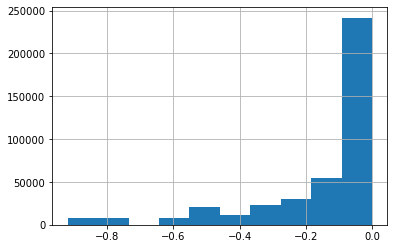

In [96]:
merged[merged["Inflation"] == "deflation"]["CPI_Percent_Change"].hist()

In [97]:
merged["Inflation"].value_counts()

mid          1017727
high          956019
low           890923
deflation     404412
Name: Inflation, dtype: int64

In [98]:
Industry_Inflation_group=merged.groupby(["ICBIndustry","Inflation"]).mean()["MthRet"]


/var/folders/m6/h9jtrhyn259fytxp6j9xh9v00000gn/T/ipykernel_23589/2053539105.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [99]:
#plot a bar graph of the average returns for each industry and inflation level
import plotly.graph_objects as go
fig = go.Figure()
for i in Industry_Inflation_group.index.levels[0]:
    fig.add_trace(go.Bar(x=Industry_Inflation_group[i].index, y=Industry_Inflation_group[i].values, name=i))
fig.show()


In [100]:
merged

,PERMNO,PrimaryExch,SecurityNm,Ticker,SICCD,ICBIndustry,MthCalDt,MthPrc,MthRet,MthVol,ShrOut,date,CPI_Percent_Change,Inflation
0,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-01-31,4.375,0.707317,177082.0,3680.0,1986-01-31,-0.18198,deflation
1,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-02-28,3.25,-0.257143,82800.0,3680.0,1986-02-28,-0.54695,deflation
2,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-03-31,4.4375,0.365385,107801.0,3680.0,1986-03-31,-0.36664,deflation
3,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-04-30,4.0,-0.098592,95700.0,3793.0,1986-04-30,0.27599,mid
4,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-05-30,3.1094,-0.222656,107362.0,3793.0,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4664110,93436,Q,TESLA INC; COM NONE; CONS,TSLA,9999,CONDIS,2021-11-30,"1,144.7600",0.027612,645719701.0,1004265.0,2021-11-30,0.57517,high
4664111,93436,Q,TESLA INC; COM NONE; CONS,TSLA,9999,CONDIS,2021-12-31,"1,056.7800",-0.076855,507511834.0,1033508.0,2021-12-31,0.64507,high
4664112,93436,Q,TESLA INC; COM NONE; CONS,TSLA,9999,CONDIS,2022-01-31,936.7200,-0.113609,636164125.0,1033508.0,2022-01-31,0.79771,high
4664113,93436,Q,TESLA INC; COM NONE; CONS,TSLA,9999,CONDIS,2022-02-28,870.4300,-0.070768,460954079.0,1033508.0,2022-02-28,1.24075,high


In [42]:
sic = pd.read_csv("sic.csv")

In [47]:
stocks['Industry Code'] = stocks["SICCD"].astype(str).str[:2].astype(int)

In [49]:
industry_codes = pd.read_csv("industry_groups.csv")

In [65]:
sic.head()

,Division,Major Group,Industry Group,SIC,Description
0,A,1,11,111,Wheat
1,A,1,11,112,Rice
2,A,1,11,115,Corn
3,A,1,11,116,Soybeans
4,A,1,11,119,"Cash Grains, Not Elsewhere Classified"


In [71]:
sic

,Division,Major Group,Industry Group,SIC,Description
0,A,1,11,111,Wheat
1,A,1,11,112,Rice
2,A,1,11,115,Corn
3,A,1,11,116,Soybeans
4,A,1,11,119,"Cash Grains, Not Elsewhere Classified"
...,...,...,...,...,...
1000,J,96,965,9651,"Regulation, Licensing, and Inspection of Misce..."
1001,J,96,966,9661,Space and Research and Technology
1002,J,97,971,9711,National Security
1003,J,97,972,9721,International Affairs


In [66]:
stocks.head()

,PERMNO,PrimaryExch,SecurityNm,Ticker,SICCD,ICBIndustry,MthCalDt,MthPrc,MthRet,MthVol,ShrOut,Industry Code
0,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-01-31,4.375,0.707317,177082.0,3680.0,39
1,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-02-28,3.25,-0.257143,82800.0,3680.0,39
2,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-03-31,4.4375,0.365385,107801.0,3680.0,39
3,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-04-30,4.0,-0.098592,95700.0,3793.0,39
4,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-05-30,3.1094,-0.222656,107362.0,3793.0,39


In [72]:
sic[sic["Major Group"] == 39]

,Division,Major Group,Industry Group,SIC,Description
556,D,39,391,3911,"Jewelry, Precious Metal"
557,D,39,391,3914,"Silverware, Plated Ware, and Stainless Steel Ware"
558,D,39,391,3915,"Jewelers' Findings and Materials, and Lapidary..."
559,D,39,393,3931,Musical Instruments
560,D,39,394,3942,Dolls and Stuffed Toys
561,D,39,394,3944,"Games, Toys, and Children's Vehicles, Except D..."
562,D,39,394,3949,"Sporting and Athletic Goods, Not Elsewhere Cla..."
563,D,39,395,3951,"Pens, Mechanical Pencils, and Parts"
564,D,39,395,3952,"Lead Pencils, Crayons, and Artists' Materials"
565,D,39,395,3953,Marking Devices


In [67]:
stocks = pd.merge(stocks, sic, left_on="SICCD", right_on="SIC", how="left")

,PERMNO,PrimaryExch,SecurityNm,Ticker,SICCD,ICBIndustry,MthCalDt,MthPrc,MthRet,MthVol,ShrOut,Industry Code,Division,Major Group,Industry Group,SIC,Description
0,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-01-31,4.375,0.707317,177082.0,3680.0,39,NaN,NaN,NaN,NaN,NaN
1,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-02-28,3.25,-0.257143,82800.0,3680.0,39,NaN,NaN,NaN,NaN,NaN
2,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-03-31,4.4375,0.365385,107801.0,3680.0,39,NaN,NaN,NaN,NaN,NaN
3,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-04-30,4.0,-0.098592,95700.0,3793.0,39,NaN,NaN,NaN,NaN,NaN
4,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,1986-05-30,3.1094,-0.222656,107362.0,3793.0,39,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4664110,93436,Q,TESLA INC; COM NONE; CONS,TSLA,9999,CONDIS,2021-11-30,"1,144.7600",0.027612,645719701.0,1004265.0,99,J,99.0,999.0,9999.0,Nonclassifiable Establishments
4664111,93436,Q,TESLA INC; COM NONE; CONS,TSLA,9999,CONDIS,2021-12-31,"1,056.7800",-0.076855,507511834.0,1033508.0,99,J,99.0,999.0,9999.0,Nonclassifiable Establishments
4664112,93436,Q,TESLA INC; COM NONE; CONS,TSLA,9999,CONDIS,2022-01-31,936.7200,-0.113609,636164125.0,1033508.0,99,J,99.0,999.0,9999.0,Nonclassifiable Establishments
4664113,93436,Q,TESLA INC; COM NONE; CONS,TSLA,9999,CONDIS,2022-02-28,870.4300,-0.070768,460954079.0,1033508.0,99,J,99.0,999.0,9999.0,Nonclassifiable Establishments


<AxesSubplot:>

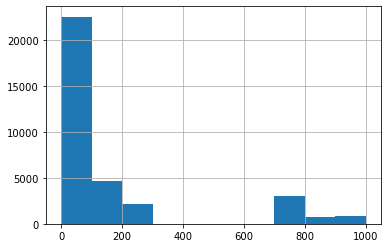

In [62]:
stocks[stocks["SICCD"] < 1000]["SICCD"].hist()

In [63]:
industry_codes

,Division,Major Group,Industry Group,Description
0,A,1,11,Cash Grains
1,A,1,13,"Field Crops, Except Cash Grains"
2,A,1,16,Vegetables And Melons
3,A,1,17,Fruits And Tree Nuts
4,A,1,18,Horticultural Specialties
...,...,...,...,...
411,J,96,965,"Regulation, Licensing, And Inspection Of"
412,J,96,966,Space Research And Technology
413,J,97,971,National Security
414,J,97,972,International Affairs


In [43]:
sic

,Division,Major Group,Industry Group,SIC,Description
0,A,1,11,111,Wheat
1,A,1,11,112,Rice
2,A,1,11,115,Corn
3,A,1,11,116,Soybeans
4,A,1,11,119,"Cash Grains, Not Elsewhere Classified"
...,...,...,...,...,...
1000,J,96,965,9651,"Regulation, Licensing, and Inspection of Misce..."
1001,J,96,966,9661,Space and Research and Technology
1002,J,97,971,9711,National Security
1003,J,97,972,9721,International Affairs


In [44]:
criteria = [merged['SICCD'].between(1, 3), merged['SICCD'].between(4, 7), merged['SICCD'].between(8, 10)]

values = ["Agriculture, Forestry and Fishing", "Mining", 3]
